## A library of mark scaling functions which preserve endpoints.

In [1]:
import lesterScaling

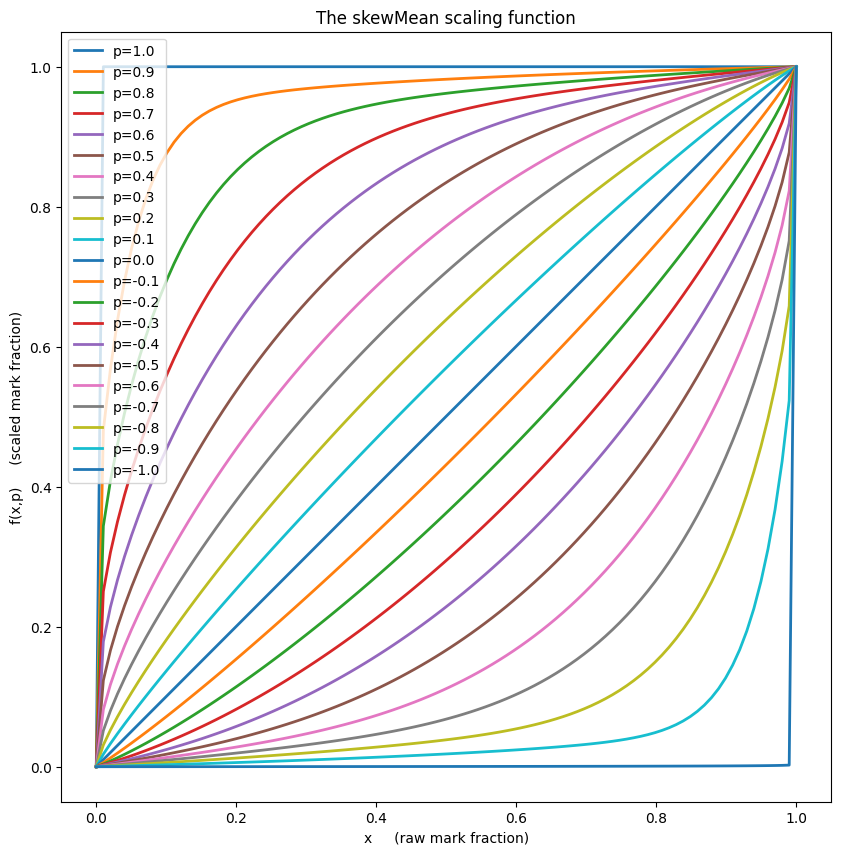

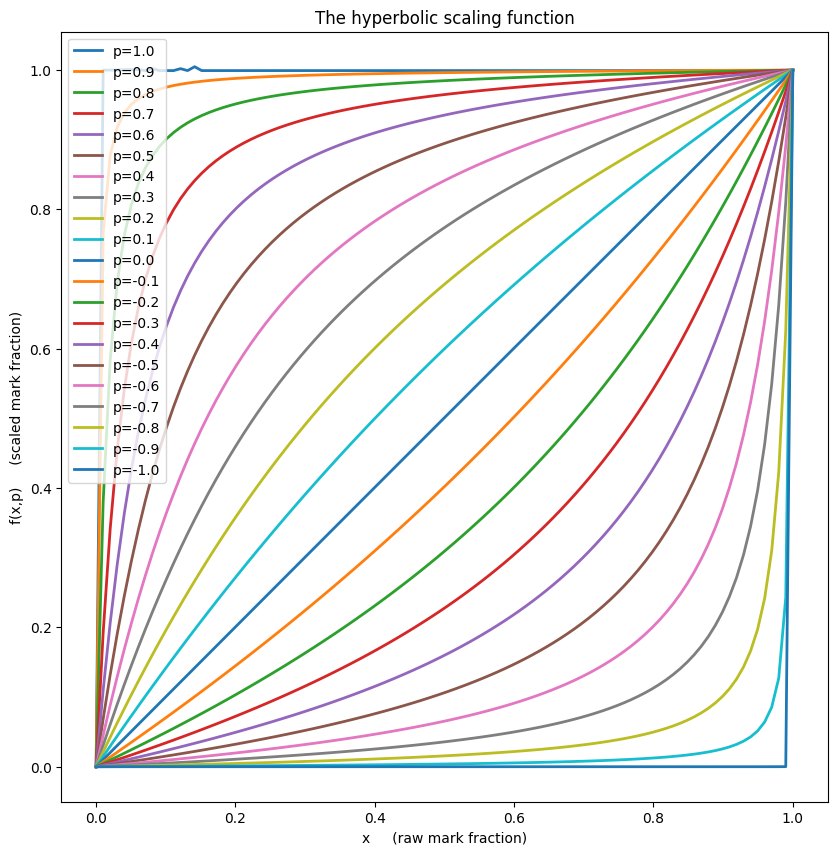

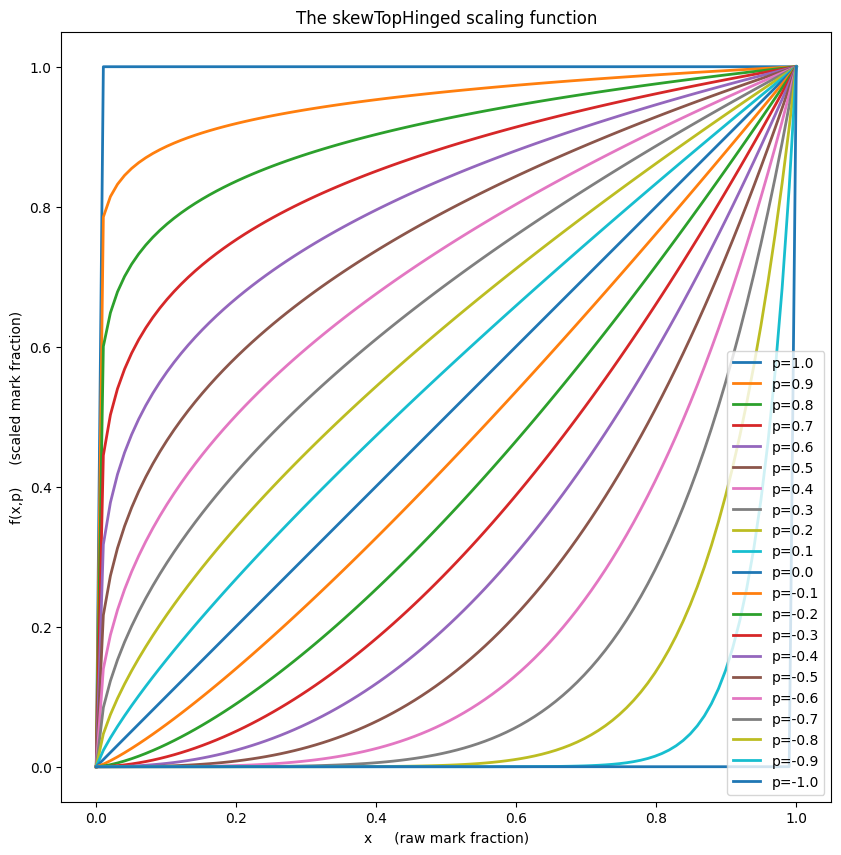

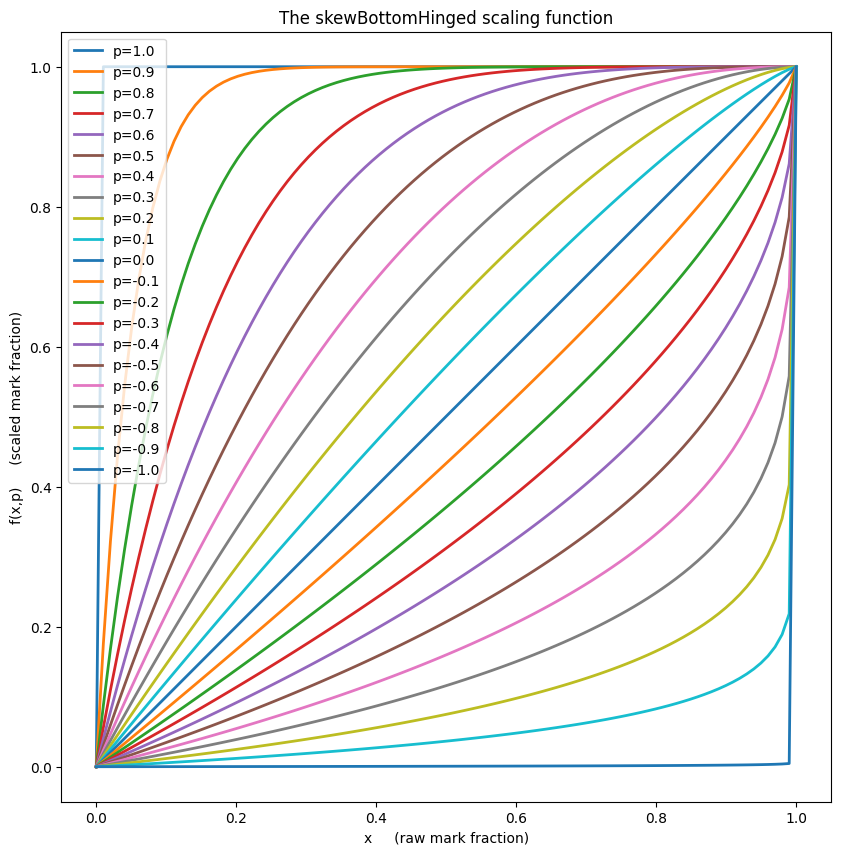

In [2]:
lesterScaling.demo()